In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# General imports
import cortex
import importlib
import ipdb
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
sys.path.append("{}/../../../../utils".format(os.getcwd()))
from surface_utils import load_surface ,make_surface_image
from pycortex_utils import set_pycortex_config_file, get_roi_verts_hemi

In [2]:
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
pycortex_subject = 'sub-170k'
subject = 'sub-08' 
format_ = '170k'
# load data
subject = 'sub-170k'
rois = ['V1']
input_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-08/170k/prf/prf_derivatives/sub-08_task-pRF_fmriprep_dct_avg_prf-deriv_gauss_gridfit.dtseries.nii'



In [113]:
mmp_atlas_fn ='/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/mmp_atlas.npz'
atlas_label_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/atlas_label.npz'
parcelation_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/parcellation.npz'
mmp_csv = pd.read_csv('/Users/uriel/Downloads/HCP-MMP1_UniqueRegionList.csv')
mmp_txt = pd.read_table('/Users/uriel/Downloads/HCPMMP1_on_MNI152_ICBM2009a_nlin.txt',sep= ' ')

In [4]:
mmp_npz = np.load(mmp_atlas_fn )
atlas_label = np.load(atlas_label_fn)
parcelation = np.load(parcelation_fn)

In [6]:
a = np.isnan(mmp_npz['left'])

In [10]:
mmp_npz_brain = np.concatenate([mmp_npz['left'],mmp_npz['right']])

Fontconfig warning: ignoring UTF-8: not a valid region tag


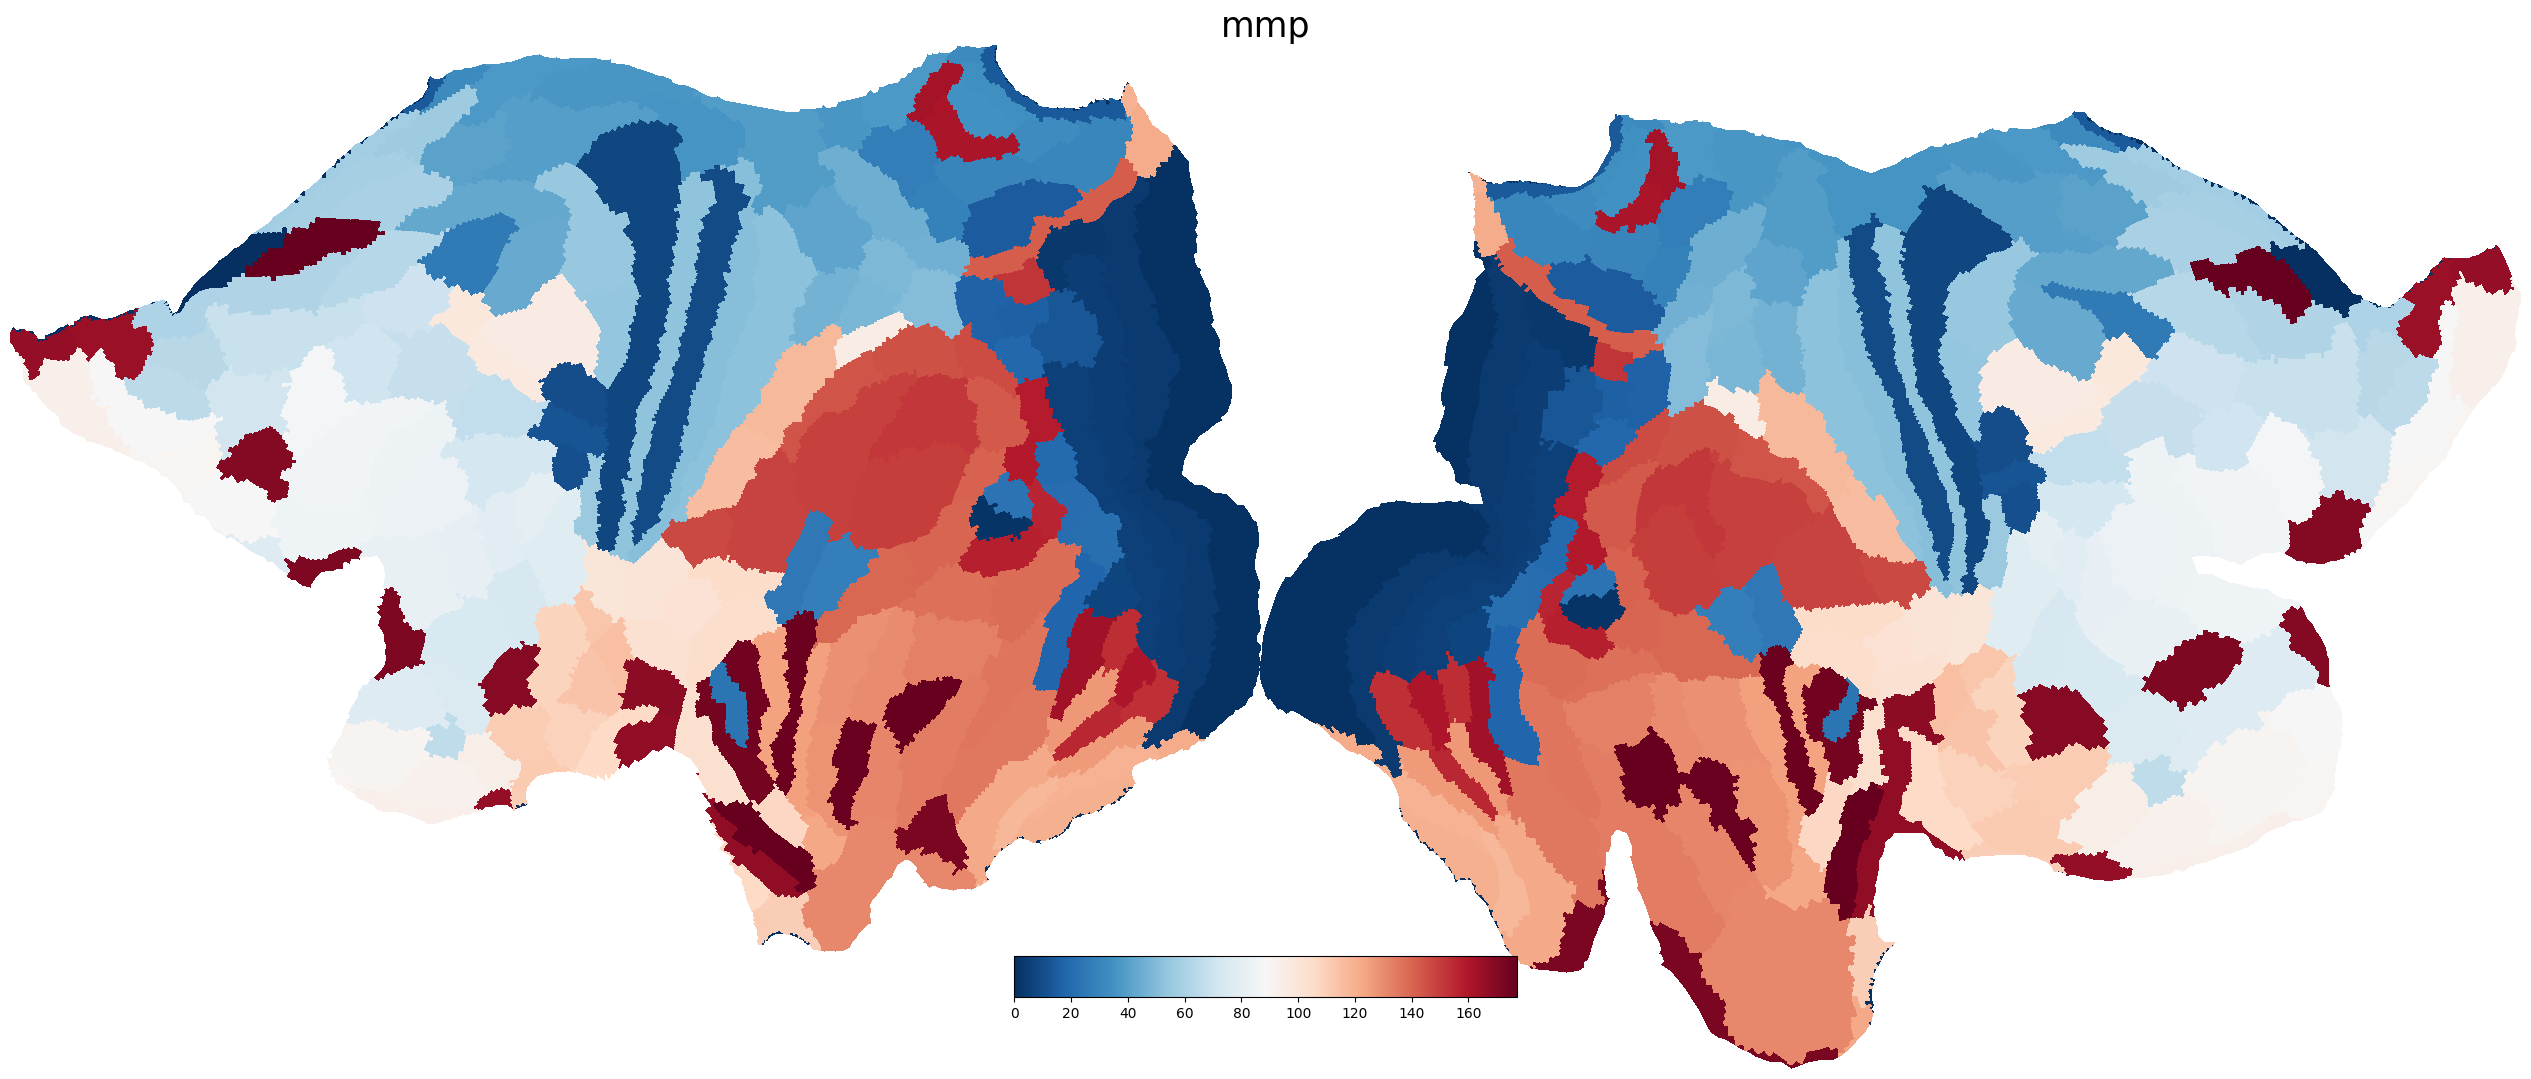

In [11]:
# plot mmp npz
vertex_data = cortex.Vertex(mmp_npz_brain, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
plt.show()

In [14]:
#  make left hemi 
mmp_df_lh = pd.DataFrame(mmp_npz['left'])
mmp_df_lh.columns = ['roi_id']
mmp_df_lh = mmp_df_lh.assign(hemi='L')
 

#  make left hemi 
mmp_df_rh = pd.DataFrame(mmp_npz['right'])
mmp_df_rh.columns = ['roi_id']
mmp_df_rh = mmp_df_rh.assign(hemi='R')
mmp_df_rh.roi_id = mmp_df_rh.roi_id + 180

#  make brain df
mmp_df_brain = pd.concat([mmp_df_lh,mmp_df_rh],ignore_index=True )
mmp_df_brain = mmp_df_brain.assign(roi_name=np.nan)

In [18]:
# verification
print(np.unique(mmp_df_lh.roi_id))
print(np.unique(mmp_df_rh.roi_id))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 2

In [147]:
#  creat the col with the index (to get the correct correspondance) 
mmp_csv = pd.read_csv('/Users/uriel/Downloads/HCP-MMP1_UniqueRegionList.csv')
mmp_csv['index_col'] = abs(mmp_csv.index +1)

In [173]:
mmp_csv

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm,index_col
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717,1
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336,2
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009,3
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220,4
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720,356
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592,357
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898,358
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827,359


In [174]:
mmp_csv.loc[(mmp_csv['region'] == 'RSC') ]

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm,index_col
13,RSC_L,RetroSplenial_Complex_L,14_L,L,RSC,Par,Posterior_Cingulate,14,18,96.918149,86.602610,88.986951,843,14
193,RSC_R,RetroSplenial_Complex_R,214_R,R,RSC,Par,Posterior_Cingulate,214,18,84.934198,92.434662,93.496756,1079,194


In [155]:
#  corectiom to have the good code for p24 area

mmp_csv.loc[mmp_csv['index_col'] == 360, 'index_col'] = 0

In [157]:
# make the final df
mmp_final_df = pd.merge(mmp_df_brain, mmp_csv, left_on='roi_id', right_on='index_col', how='left')
mmp_final_df = mmp_final_df[['roi_id', 'region','hemi']]
mmp_final_df.rename(columns={'region': 'roi_name'}, inplace=True)


In [165]:
# make an object with the rois 
V1 = np.zeros(len(mmp_final_df))
V1[mmp_final_df['roi_name'] == 'RSC'] = 1

Fontconfig warning: ignoring UTF-8: not a valid region tag


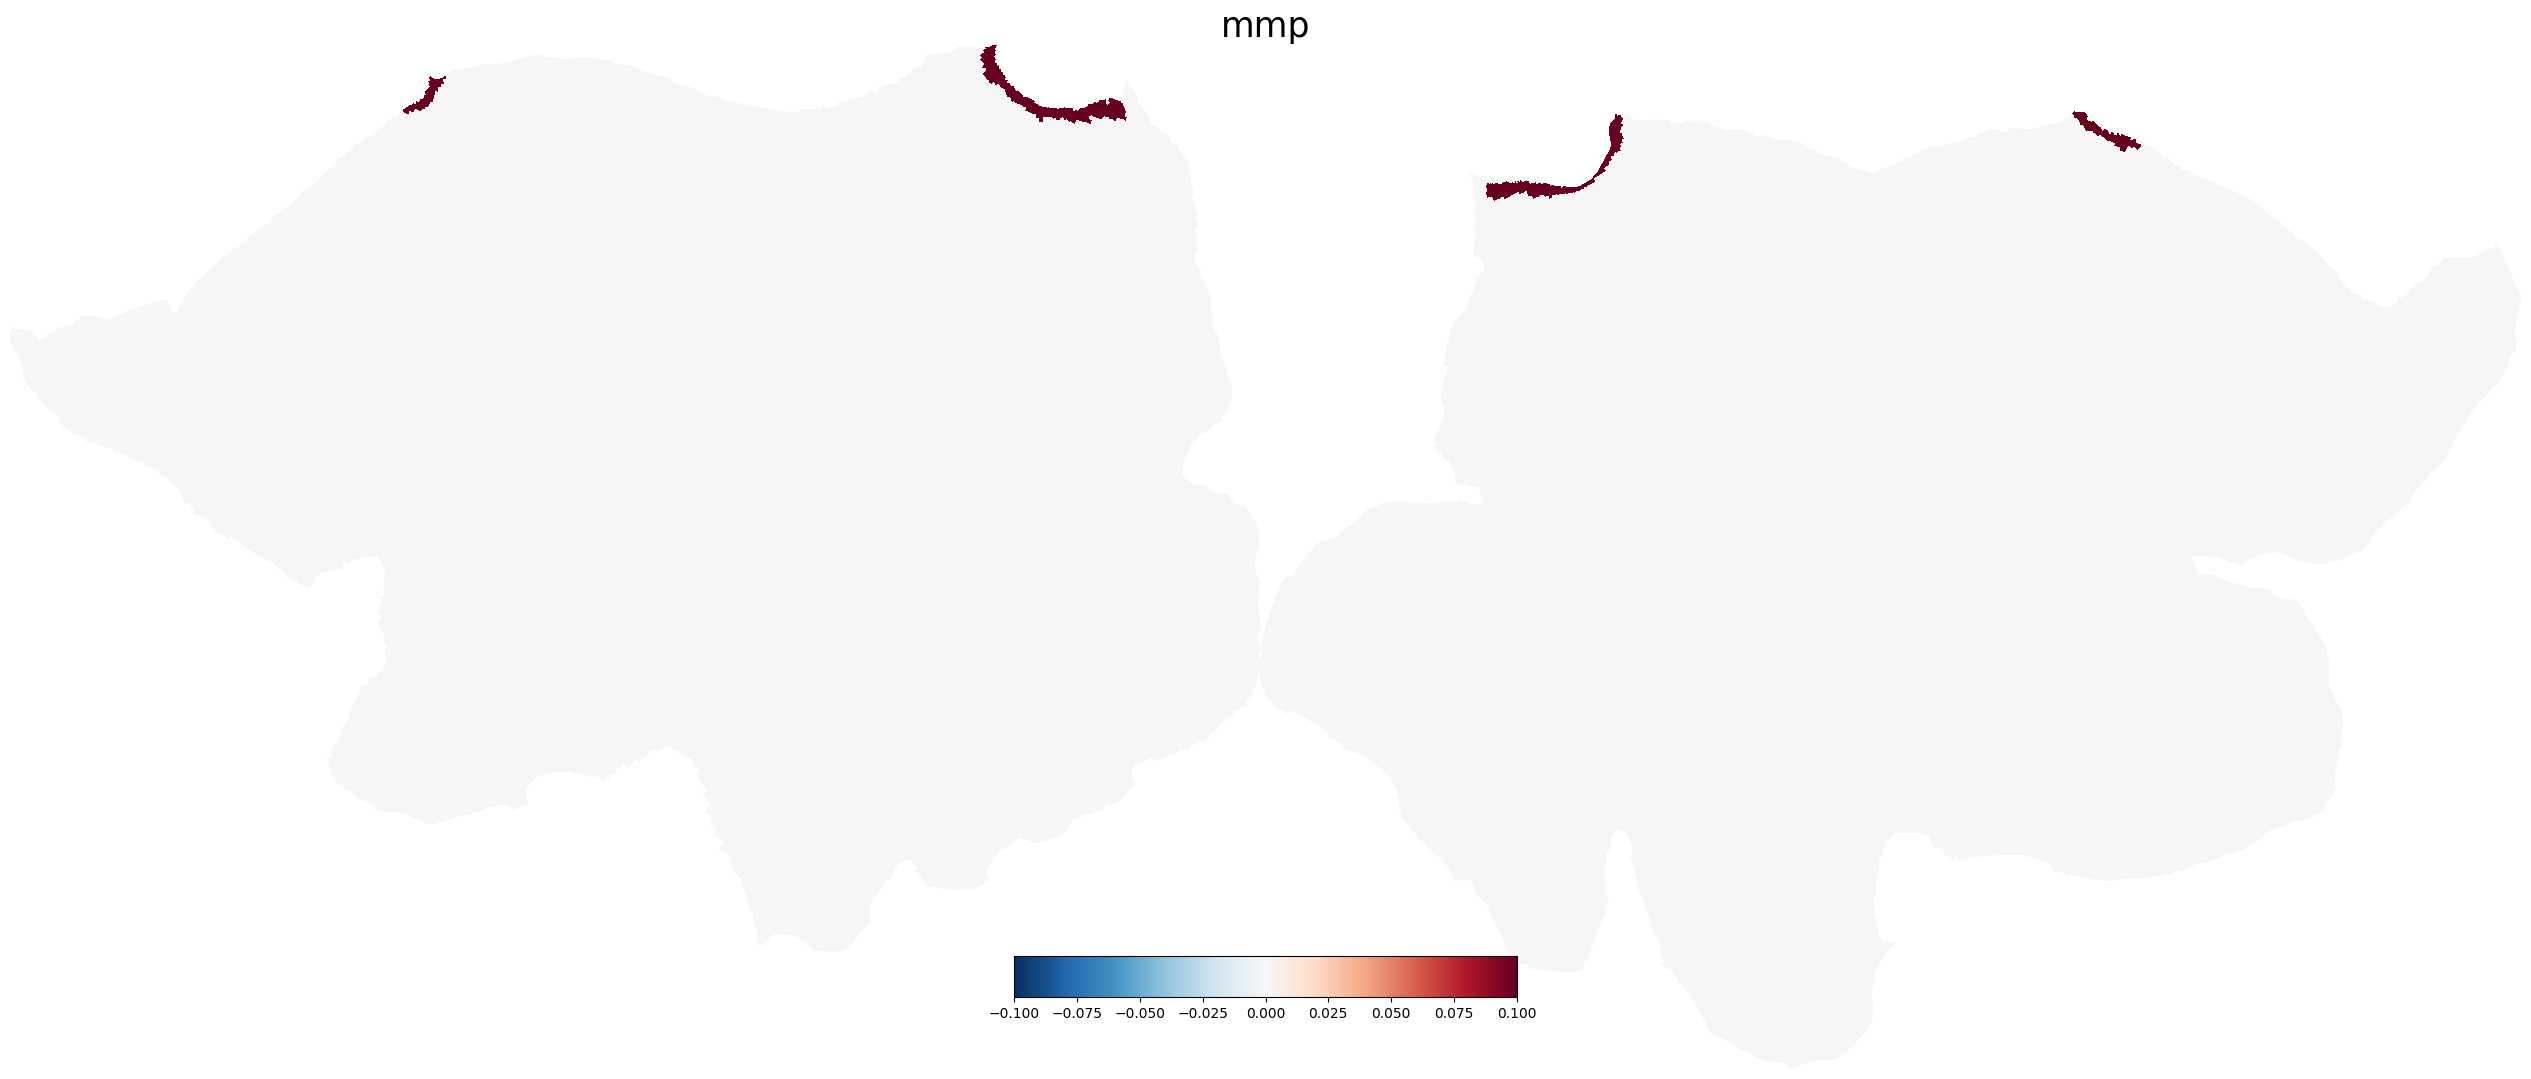

In [166]:
# plot mmp npz
vertex_data = cortex.Vertex(V1, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [123]:
V1_b = np.zeros(len(mmp_df_brain))

# Mettre à jour les valeurs correspondantes à 1 où roi_name est égal à 'V1'
V1_b[mmp_df_brain['roi_id'] == 180] = 1

Fontconfig warning: ignoring UTF-8: not a valid region tag


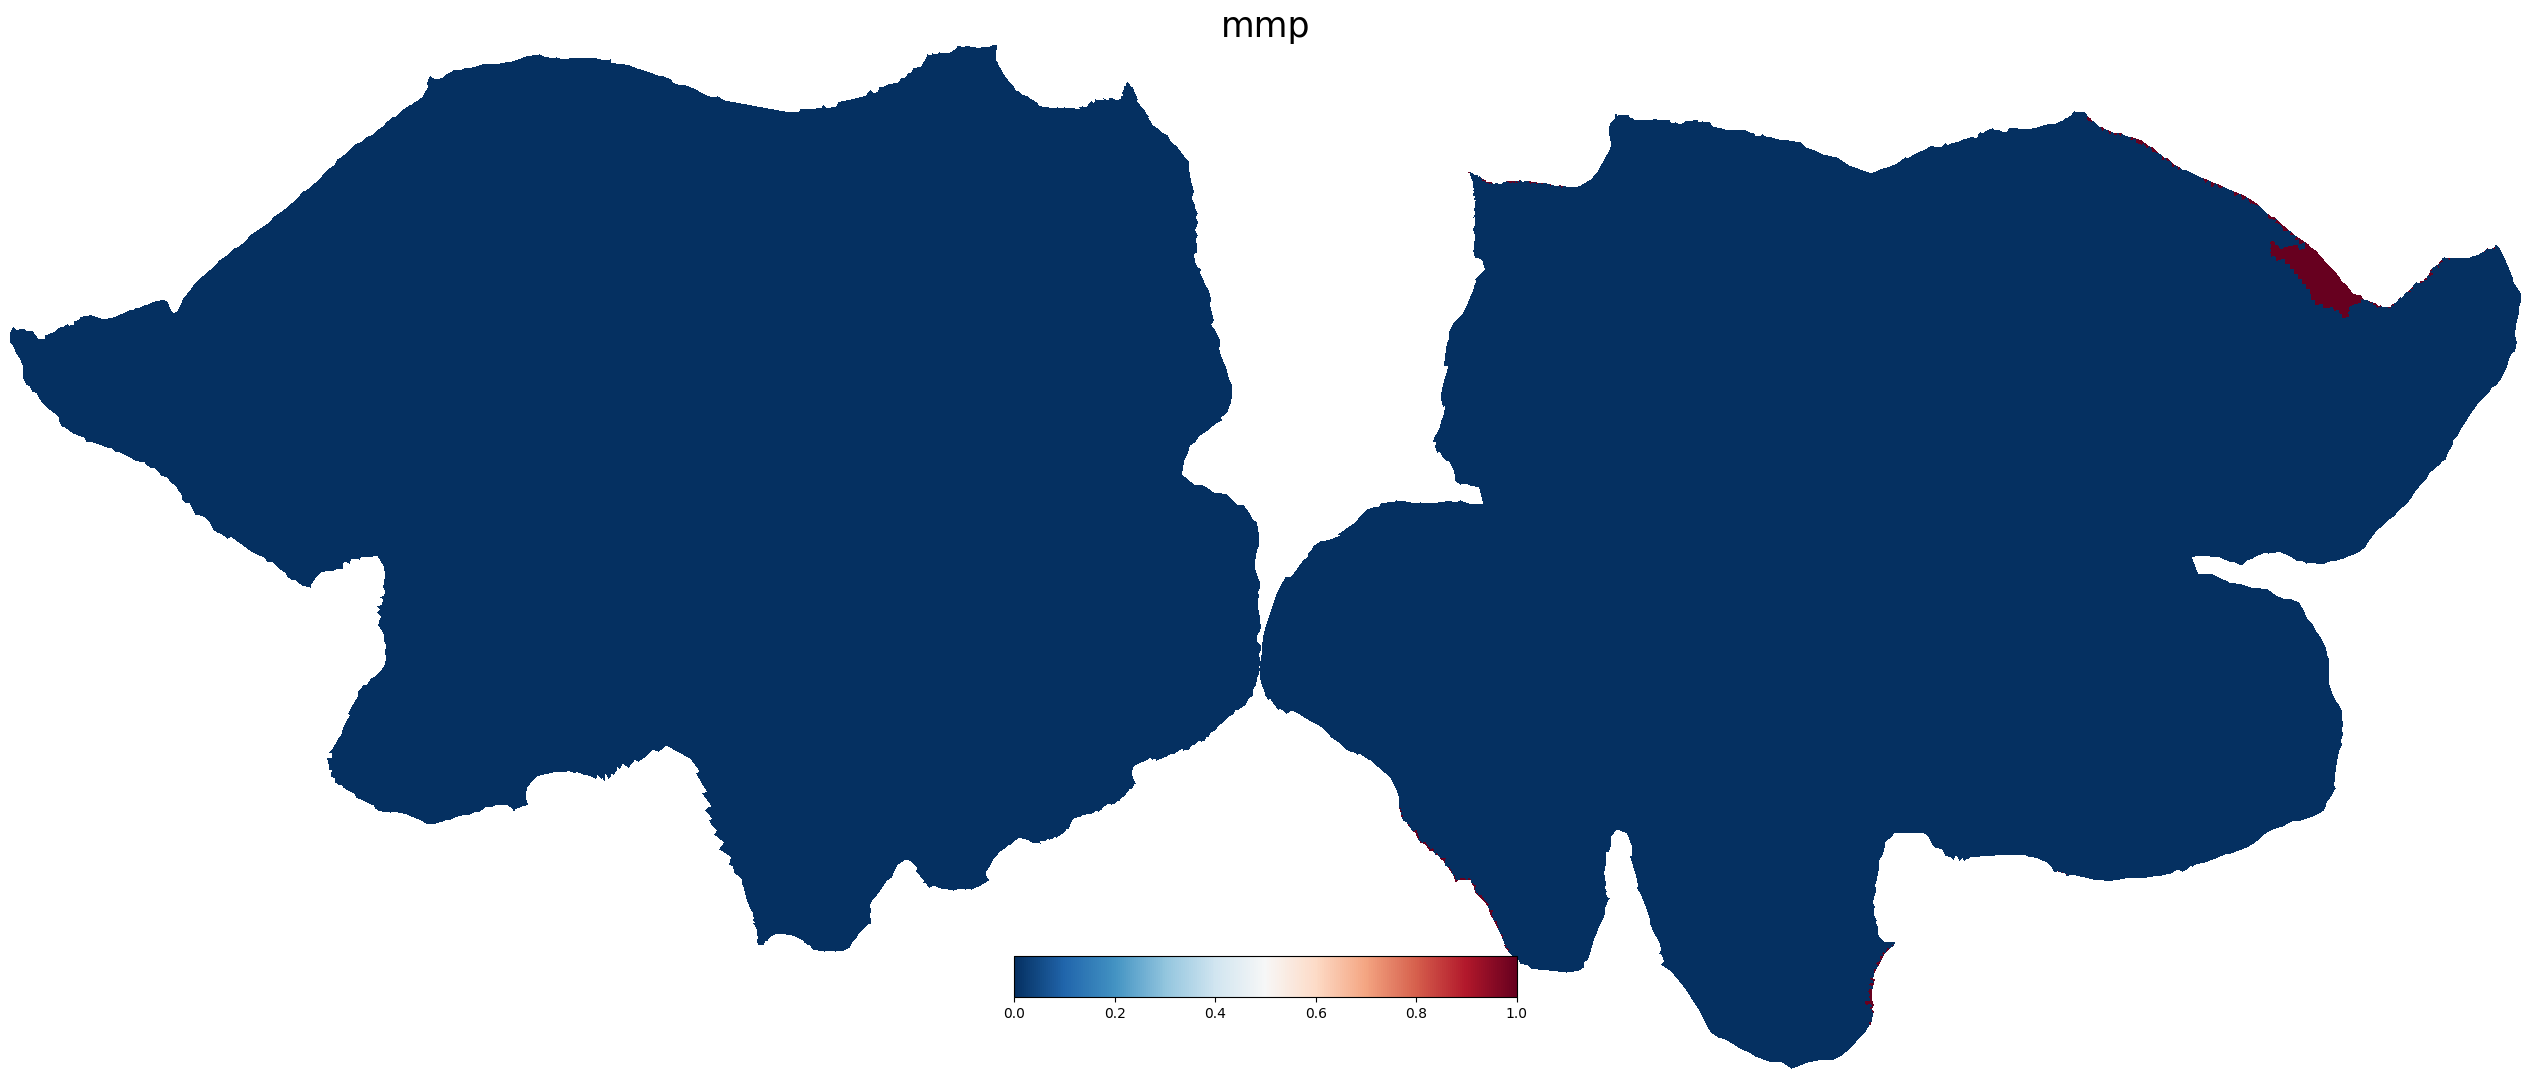

In [124]:
# plot mmp npz
vertex_data = cortex.Vertex(V1_b, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [160]:
# make a final dict with rois masks
rois = mmp_final_df.roi_name.unique()
roi_dict = {}
for roi in rois:
    roi_data = np.zeros(len(mmp_final_df), dtype=bool)
    roi_data[mmp_final_df['roi_name'] == roi] = True
    roi_dict[roi] = roi_data

# convert keys to string to avoide problems
roi_dict = {str(key): value for key, value in roi_dict.items()}

In [161]:
len(roi_dict.keys())

180

In [177]:
keys = 'RSC'
if keys in roi_dict:
    if any(roi_dict['RSC']):
        print("True RSC values exist.")
    else:
        print("True RSC values doesn’t exist")
else:
    print("RSC keys  doesn’t exist")

True RSC values exist.


In [162]:
# save the dict as npz
np.savez('/Users/uriel/Downloads/rois.npz', **roi_dict)

In [178]:
import cortex
from cortex.rois import *
# overlay_fn = '/Users/uriel/Downloads/rois2.svg'
overlay_fn ='/Users/uriel/Desktop/dossier sans titre/sub-170k/overlays.svg'
npz_fn = '/Users/uriel/Downloads/rois.npz'

rp = ROIpack('sub-170k',npz_fn)
rp.to_svg(filename=overlay_fn)
#will give a svg file in the /tmp directory

Adding d23ab..
Adding 2..
Adding 55b..
Adding SFL..
Adding V3A..
Adding PFm..
Adding a9-46v..
Adding p24..
Adding VMV1..
Adding TE1p..
Adding OP2-3..
Adding TGd..
Adding RSC..
Adding v23ab..
Adding POS1..
Adding ProS..
Adding V1..
Adding V2..
Adding VMV2..
Adding H..
Adding PreS..
Adding PHA1..
Adding 23d..
Adding 23c..
Adding 24dv..
Adding SCEF..
Adding 8BL..
Adding 8BM..
Adding d32..
Adding a32pr..
Adding p32pr..
Adding p24pr..
Adding a24pr..
Adding 33pr..
Adding 31pv..
Adding 31pd..
Adding 31a..
Adding PCV..
Adding 5mv..
Adding 7Am..
Adding 5L..
Adding 1..
Adding 3b..
Adding 3a..
Adding 4..
Adding 6mp..
Adding 6ma..
Adding 5m..
Adding 24dd..
Adding FEF..
Adding 6a..
Adding s6-8..
Adding 6d..
Adding 7PC..
Adding AIP..
Adding IP2..
Adding PFt..
Adding PF..
Adding PGi..
Adding TPOJ2..
Adding TPOJ1..
Adding PHT..
Adding PFcm..
Adding RI..
Adding STSvp..
Adding STSdp..
Adding A5..
Adding A4..
Adding PBelt..
Adding LBelt..
Adding A1..
Adding STV..
Adding PSL..
Adding Ig..
Adding PoI1..
Ad

In [92]:
roi_dict.to_npz('/Users/uriel/Downloads/testnpz')

AttributeError: 'dict' object has no attribute 'to_npz'

In [103]:
overlay_fn2 = '/Users/uriel/Downloads/rois3.svg'
rp = ROIpack('sub-170k',npz_fn)
rp.to_npz('/Users/uriel/Downloads/testnpz')

rpAH2 = ROIpack('sub-170k','/Users/uriel/Downloads/testnpz.npz')

rpAH2.to_svg(filename=overlay_fn2)

Adding d23ab..
Adding 2..
Adding 55b..
Adding SFL..
Adding V3A..
Adding PFm..
Adding a9-46v..
Adding nan..
Adding VMV1..
Adding TE1p..
Adding OP2-3..
Adding TGd..
Adding RSC..
Adding v23ab..
Adding POS1..
Adding ProS..
Adding V1..
Adding V2..
Adding VMV2..
Adding H..
Adding PreS..
Adding PHA1..
Adding 23d..
Adding 23c..
Adding 24dv..
Adding SCEF..
Adding 8BL..
Adding 8BM..
Adding d32..
Adding a32pr..
Adding p32pr..
Adding p24pr..
Adding a24pr..
Adding 33pr..
Adding 31pv..
Adding 31pd..
Adding 31a..
Adding PCV..
Adding 5mv..
Adding 7Am..
Adding 5L..
Adding 1..
Adding 3b..
Adding 3a..
Adding 4..
Adding 6mp..
Adding 6ma..
Adding 5m..
Adding 24dd..
Adding FEF..
Adding 6a..
Adding s6-8..
Adding 6d..
Adding 7PC..
Adding AIP..
Adding IP2..
Adding PFt..
Adding PF..
Adding PGi..
Adding TPOJ2..
Adding TPOJ1..
Adding PHT..
Adding PFcm..
Adding RI..
Adding STSvp..
Adding STSdp..
Adding A5..
Adding A4..
Adding PBelt..
Adding LBelt..
Adding A1..
Adding STV..
Adding PSL..
Adding Ig..
Adding PoI1..
Ad

In [100]:
a = np.load('/Users/uriel/Downloads/testnpz.npz')

In [102]:
a['V1']

array([False, False, False, ..., False, False, False])

In [ ]:
overlay_fn3 = '/Users/uriel/Downloads/rois3.svg'

rp = ROIpack('AH','./pycortex/db/AH/rois.svg')
rp.to_npz('testnpz')

rpAH2 = ROIpack('AH2','testnpz.npz')

rpAH2.to_svg()
#will give a svg file in the /tmp directory

note : 
the code in the npz 0 for nothing and start with V1 = 1 thats why we need to make + 1 on the idx of the csv